In [1]:
from HydroshedsProcessingToolbox import *

In [2]:
# Read the raster data using rasterio
SRTM_TWI = rasterio.open(r"D:\Hydrosheds\Outputs\Python\SRTM\SRTM_TWI.tif")
SRTM_TRI = rasterio.open(r"D:\Hydrosheds\Outputs\Python\SRTM\SRTM_TRI.tif")
SRTM_Geomorphons = rasterio.open(r"D:\Hydrosheds\Outputs\Python\SRTM\SRTM_Geomorphons.tif")
TDMX_TWI = rasterio.open(r"D:\Hydrosheds\Outputs\Python\TanDEM-X\TDMX_TWI.tif")
TDMX_TRI = rasterio.open(r"D:\Hydrosheds\Outputs\Python\TanDEM-X\TDMX_TRI.tif")
TDMX_Geomorphons = rasterio.open(r"D:\Hydrosheds\Outputs\Python\TanDEM-X\TDMX_GEOMORPHONS.tif")
MEAN_Multi_Annual_Soil_Moisture_1991_2020 = rasterio.open(r"D:\Hydrosheds\Data\DWD\EPSG_3395_TIFS\EPSG_3395_mean_multi_annual_soil_moisture_1991_2020.tif")
Multi_Annual_Precipitation_1991_2020 = rasterio.open(r"D:\Hydrosheds\Data\DWD\EPSG_3395_TIFS\EPSG_3395_multi_annual_precipitation_1991_2020.tif")
Multi_Annual_Drought_Index_1991_2020 = rasterio.open(r"D:\Hydrosheds\Data\DWD\EPSG_3395_TIFS\EPSG_3395_multi_annual_drought_index_1991_2020.tif")
BasinATLAS_lvl12_shapefile = gpd.read_file(r"D:\Hydrosheds\Data\EPSG_3395_BasinATLAS_v10_lev12\EPSG_3395_Clipped_Fixed_Geo_BasinATLAS_v10_lev12.shp")

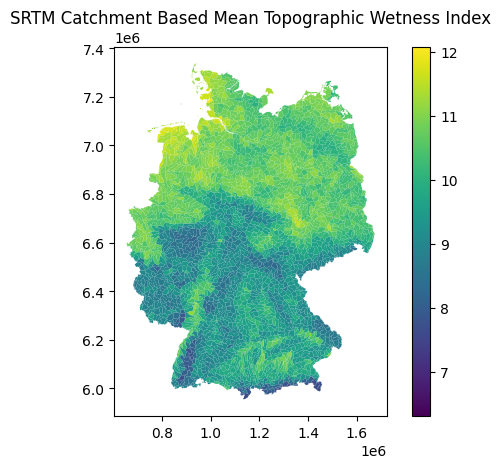

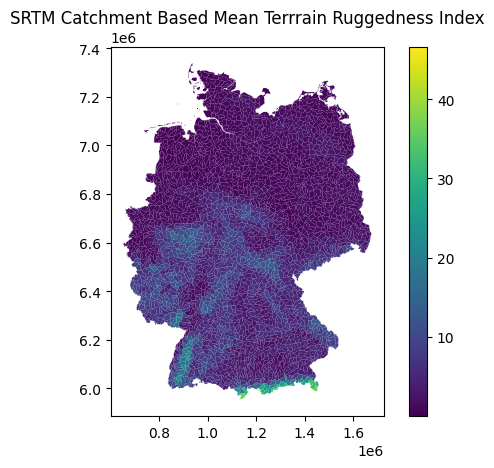

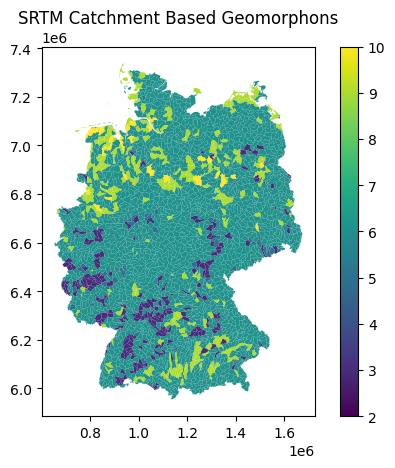

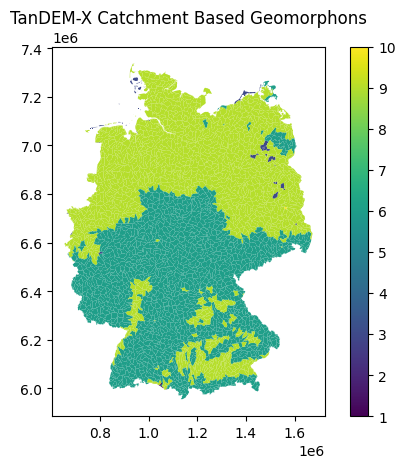

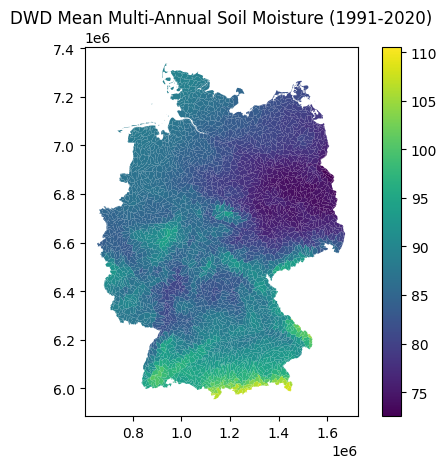

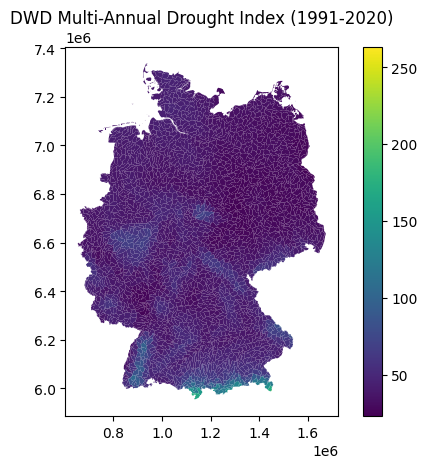

In [3]:
SRTM_twi = zonal_statistics(rasterfile=SRTM_TWI, shapefile=BasinATLAS_lvl12_shapefile, statsvar='mean', col_name = 'SRTM_TWI', plot_title = 'SRTM Catchment Based Mean Topographic Wetness Index', nodataval=32767)
SRTM_tri = zonal_statistics(rasterfile=SRTM_TRI, shapefile=BasinATLAS_lvl12_shapefile, statsvar='mean', col_name = 'SRTM_TRI', plot_title = 'SRTM Catchment Based Mean Terrrain Ruggedness Index', nodataval=32767)
SRTM_geomorphons = zonal_statistics(rasterfile=SRTM_Geomorphons, shapefile=BasinATLAS_lvl12_shapefile, statsvar ='majority', col_name = 'SRTM_Geomorphons', plot_title = "SRTM Catchment Based Geomorphons", nodataval=-32768)
TDMX_twi = zonal_statistics(rasterfile=TDMX_TWI, shapefile=BasinATLAS_lvl12_shapefile, statsvar='mean', col_name = 'TDMX_TWI', plot_title = 'TanDEM-X Catchment Based Mean Topographic Wetness Index', nodataval=-999)
TDMX_tri = zonal_statistics(rasterfile=TDMX_TRI, shapefile=BasinATLAS_lvl12_shapefile, statsvar='mean', col_name = 'TDMX_TRI', plot_title = 'TanDEM-X Catchment Based Mean Terrain Ruggedness Index',nodataval=-999)
TDMX_geomorphons = zonal_statistics(rasterfile=TDMX_Geomorphons, shapefile=BasinATLAS_lvl12_shapefile, statsvar='majority', col_name = 'TDMX_Geomorphons', plot_title = 'TanDEM-X Catchment Based Geomorphons', nodataval=32767)
multi_annual_soil_moisture_1991_2020 = zonal_statistics(rasterfile=MEAN_Multi_Annual_Soil_Moisture_1991_2020, shapefile=BasinATLAS_lvl12_shapefile, statsvar='mean', col_name='MA_Soil_Moisture', plot_title='DWD Mean Multi-Annual Soil Moisture (1991-2020)', nodataval=-9999)
multi_annual_precipitation_1991_2020 = zonal_statistics(rasterfile=Multi_Annual_Precipitation_1991_2020, shapefile=BasinATLAS_lvl12_shapefile, statsvar='mean', col_name='MA_Precipitation', plot_title='DWD Multi-Annual Precipitation Height (1991-2020)', nodataval=-999)
multi_annual_drought_index_1991_2020 = zonal_statistics(rasterfile=Multi_Annual_Drought_Index_1991_2020, shapefile=BasinATLAS_lvl12_shapefile, statsvar='mean', col_name='MA_Drought_Index', plot_title='DWD Multi-Annual Drought Index (1991-2020)', nodataval=-999)

#### Write to Disk

In [4]:
BasinATLAS_lvl12_shapefile.to_file(r"D:\Hydrosheds\Data\Modified_BasinATLAS_lvl12.gpkg", driver="GPKG")

## -----------------------------------------------------------------------------------------